<a href="https://colab.research.google.com/github/MarcelleMvondo/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Loading Data Set

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data/Housing Prices/housing.csv')

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.shape

(20640, 10)

### Data Exploration

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

In [10]:
print(X)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_

In [11]:
print(Y)

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [13]:
train_data = X_train.join(Y_train)

In [14]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12433,-116.01,33.51,24.0,2985.0,958.0,4042.0,905.0,1.7344,INLAND,66400.0
13963,-116.87,34.24,15.0,4419.0,822.0,622.0,267.0,3.9688,INLAND,182800.0
7673,-118.08,33.93,34.0,1558.0,375.0,1179.0,337.0,3.2188,<1H OCEAN,165100.0
8452,-118.35,33.91,26.0,2159.0,523.0,1331.0,520.0,3.8700,<1H OCEAN,264500.0
13188,-117.70,34.09,25.0,1719.0,331.0,1098.0,324.0,3.6250,INLAND,121800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

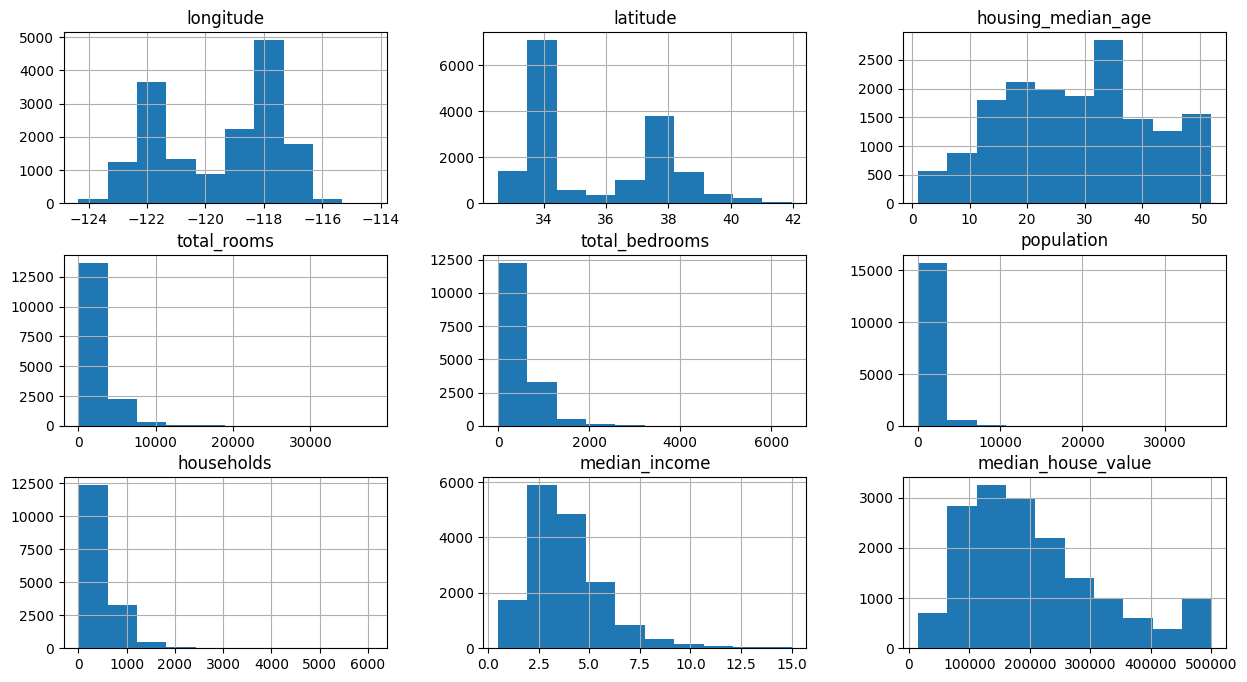

In [15]:
train_data.hist(figsize=(15,8))

<ipython-input-16-723a2c6d743a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


<Axes: >

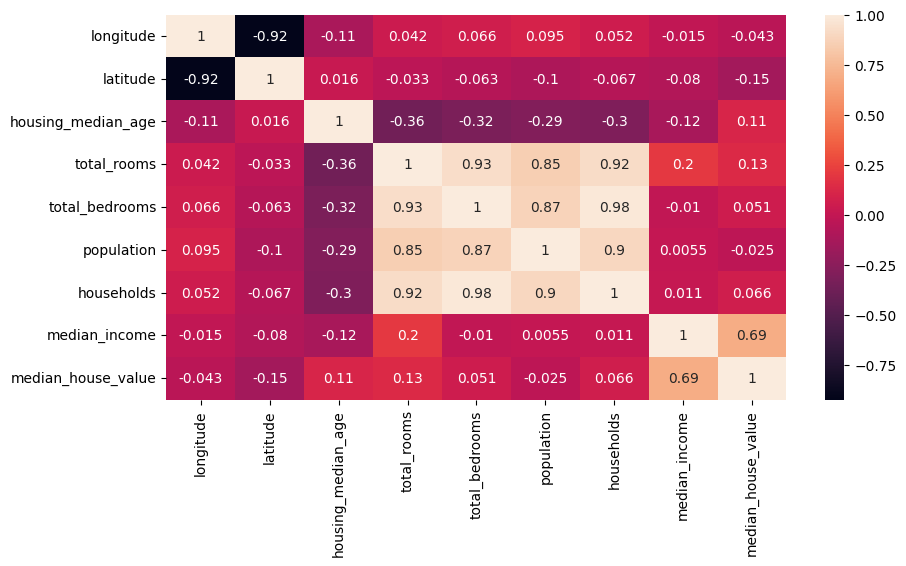

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

### Data Preprocessing

In [23]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1 )
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1 )
train_data['population'] = np.log(train_data['population'] + 1 )
train_data['households'] = np.log(train_data['households'] + 1 )

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

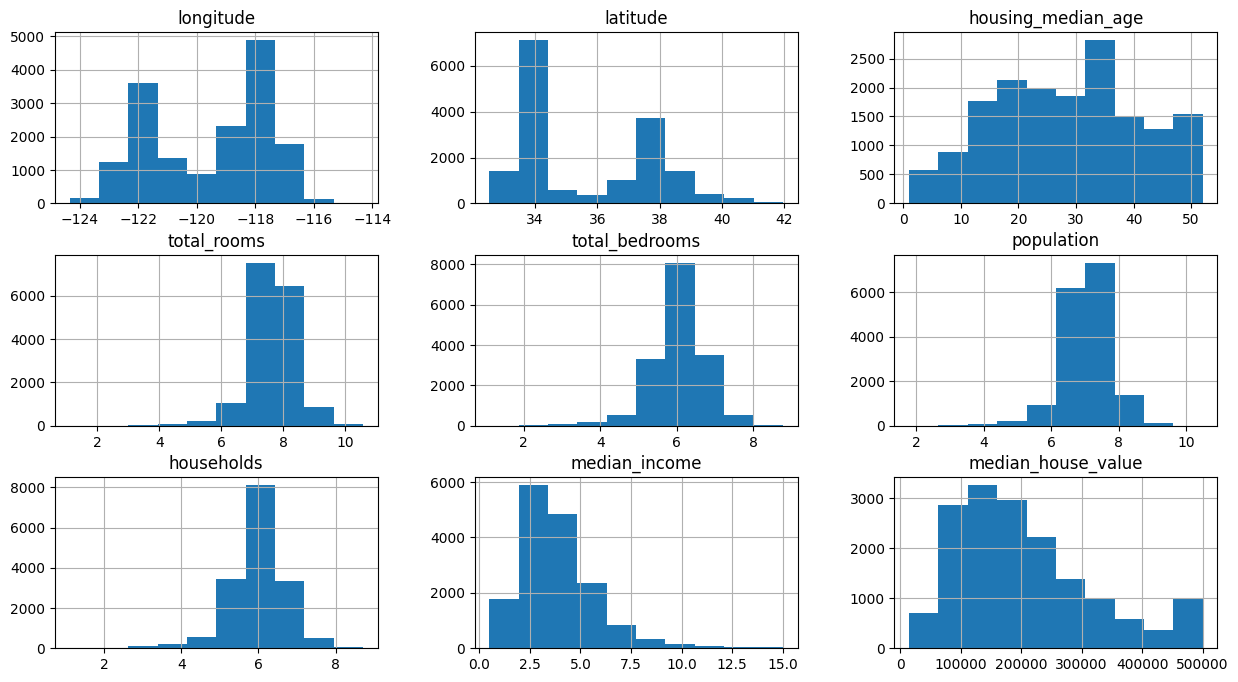

In [33]:
train_data.hist(figsize=(15,8))

In [18]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7230
INLAND        5187
NEAR OCEAN    2087
NEAR BAY      1838
ISLAND           4
Name: ocean_proximity, dtype: int64

In [21]:
# Converting 'ocean_proximity' column into binary value
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

In [22]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12433,-116.01,33.51,24.0,2985.0,958.0,4042.0,905.0,1.7344,66400.0,0,1,0,0,0
13963,-116.87,34.24,15.0,4419.0,822.0,622.0,267.0,3.9688,182800.0,0,1,0,0,0
7673,-118.08,33.93,34.0,1558.0,375.0,1179.0,337.0,3.2188,165100.0,1,0,0,0,0
8452,-118.35,33.91,26.0,2159.0,523.0,1331.0,520.0,3.8700,264500.0,1,0,0,0,0
13188,-117.70,34.09,25.0,1719.0,331.0,1098.0,324.0,3.6250,121800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16128,-122.47,37.78,52.0,2388.0,507.0,1078.0,494.0,3.5221,443300.0,0,0,0,1,0
16346,-121.34,38.03,12.0,2707.0,433.0,1200.0,380.0,4.9861,133500.0,0,1,0,0,0
14648,-117.19,32.77,14.0,3575.0,992.0,1645.0,839.0,2.4397,140600.0,0,0,0,0,1
10636,-117.79,33.70,6.0,1593.0,371.0,832.0,379.0,4.4286,239500.0,1,0,0,0,0


<Axes: >

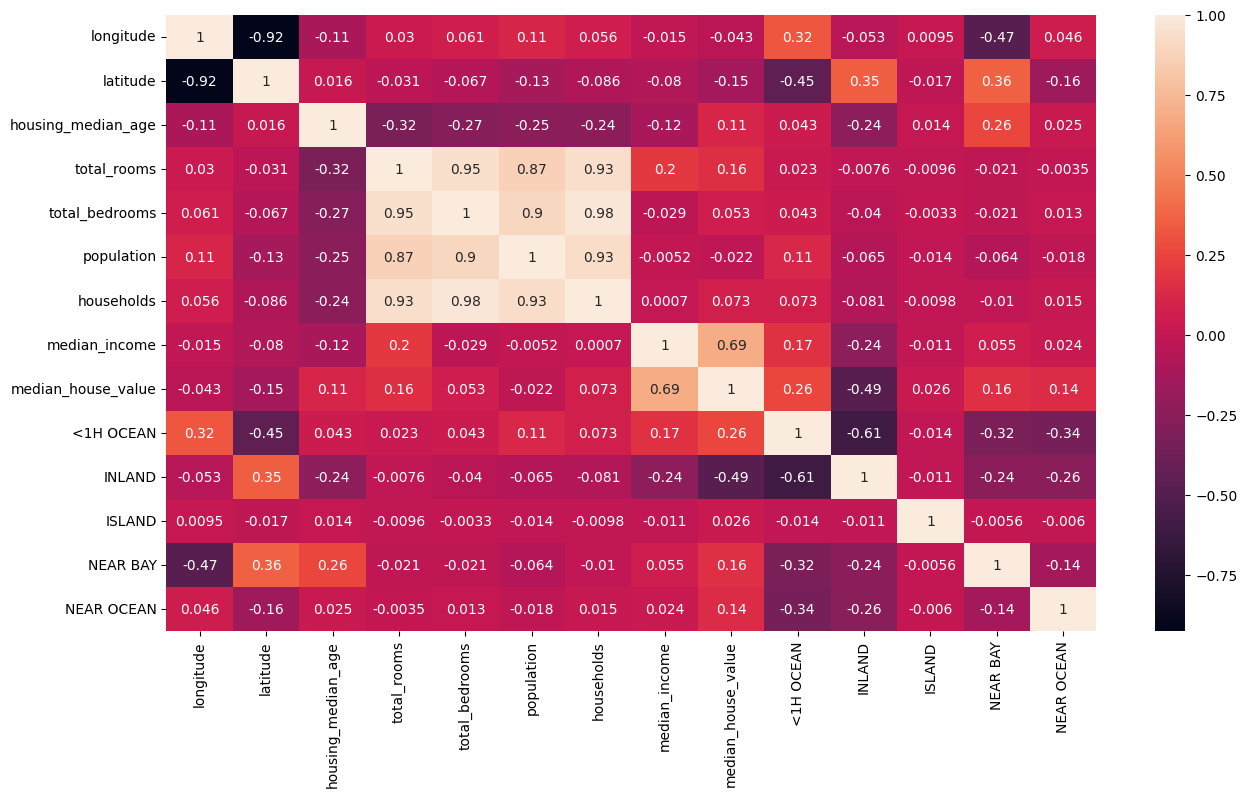

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

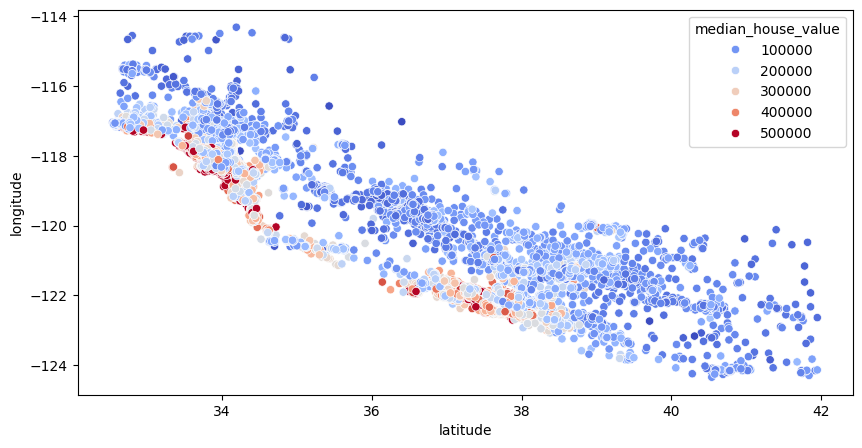

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

In [29]:
train_data['bedrom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

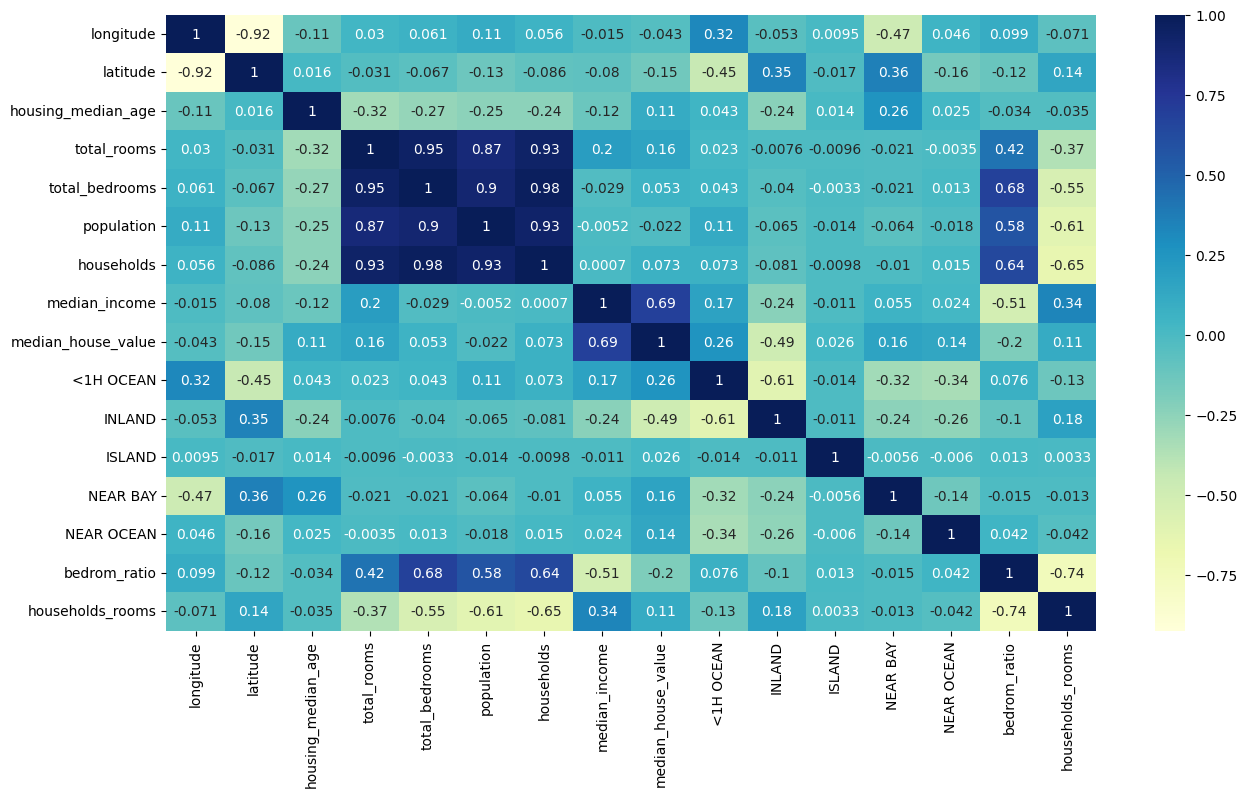

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

### Linear Regression Model

In [33]:
X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [34]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1 )
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1 )
test_data['population'] = np.log(test_data['population'] + 1 )
test_data['households'] = np.log(test_data['households'] + 1 )

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

test_data['bedrom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms'] / test_data['households']

In [36]:
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [37]:
reg.score(X_test, Y_test)

0.6602123526320965

### Random Forest Model

In [39]:
forest = RandomForestRegressor()
forest.fit(X_train, Y_train)

RandomForestRegressor()

In [40]:
forest.score(X_test, Y_test)

0.8166883756757163

In [49]:
param_grid = {
    'n_estimators' : [3, 10, 30],
    'max_features' : [2, 4, 6, 18]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)

grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 18],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
best_forest = grid_search.best_estimator_

In [51]:
best_forest

RandomForestRegressor(max_features=18, n_estimators=30)

In [44]:
best_forest.score(X_test, Y_test)

0.8140735167980768